In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
fpath = "/nfs/turbo/umms-indikar/shared/projects/geneformer/fib15k/test812.csv"

df = pd.read_csv(fpath)
df = df.drop(columns='Unnamed: 0')
print(f"{df.shape=}")
df.head()

df.shape=(2520, 6)


,cluster_number,recipe_number,recipe,reprog_to_hsc_1,fib_1_to_reprog_10,recipe_diff
0,607,61,GATA2;FOS;STAT5A;REL;ETV6,0.678985,0.200316,0.207374
1,676,68,GATA2;FOS;STAT5A;IKZF1;ETV6,0.680233,0.186998,0.205917
2,595,60,GATA2;FOS;STAT5A;REL;MEF2C,0.681894,0.200065,0.203978
3,774,78,GATA2;FOS;REL;IKZF1;ETV6,0.682960,0.191363,0.202733
4,163,17,GATA2;GFI1B;FOS;IKZF1;MEF2C,0.683928,0.202149,0.201604


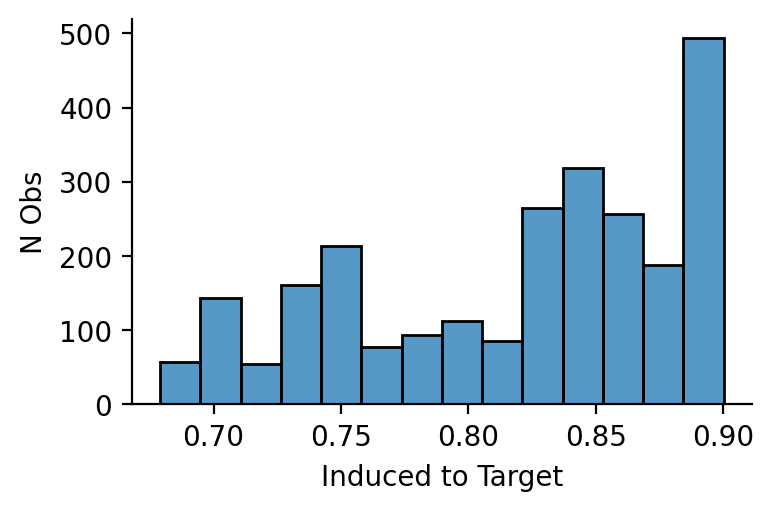

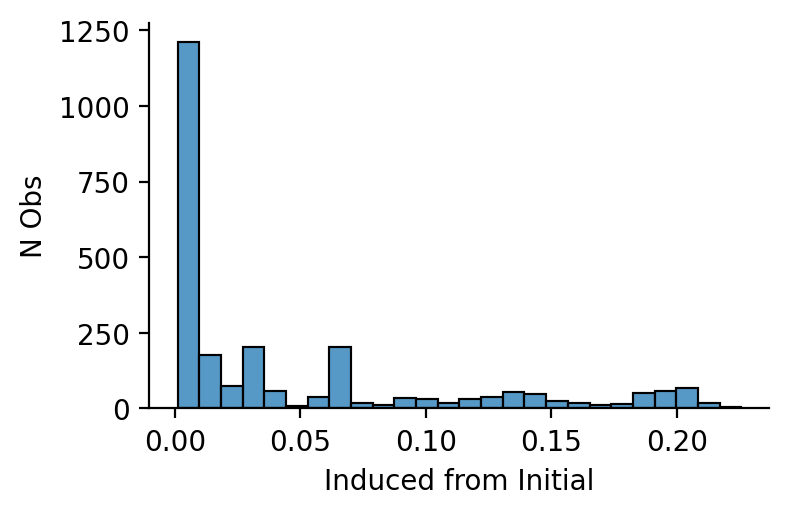

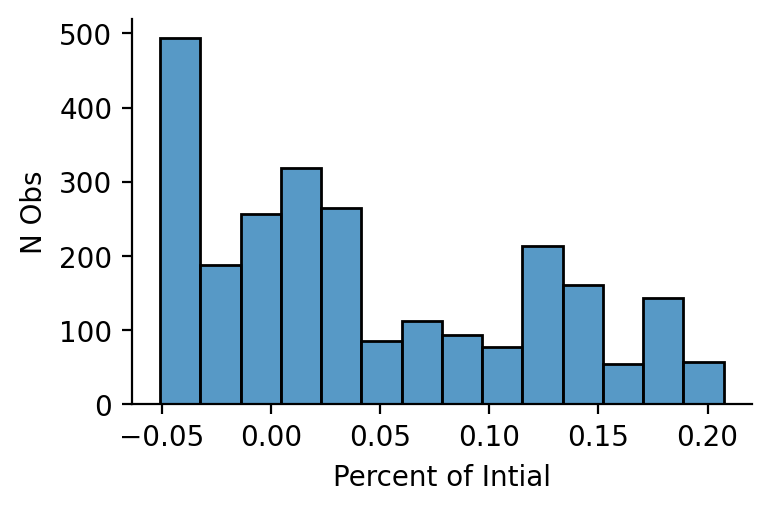

In [3]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, 2.5

col_map = {
    'reprog_to_hsc_1' : 'Induced to Target', 
    'fib_1_to_reprog_10' : 'Induced from Initial', 
    'recipe_diff' : 'Percent of Intial',
}

for col, label in col_map.items():
    sns.histplot(
        data=df,
        x=col,
    )
    plt.ylabel('N Obs')
    plt.xlabel(label)
    sns.despine()
    plt.show()


In [4]:
"""make a recipe as a list column"""

def recipe_splitter(x):
    return x.split(";")
    
df['recipe_list'] = df['recipe'].apply(recipe_splitter)
df.head()

,cluster_number,recipe_number,recipe,reprog_to_hsc_1,fib_1_to_reprog_10,recipe_diff,recipe_list
0,607,61,GATA2;FOS;STAT5A;REL;ETV6,0.678985,0.200316,0.207374,"[GATA2, FOS, STAT5A, REL, ETV6]"
1,676,68,GATA2;FOS;STAT5A;IKZF1;ETV6,0.680233,0.186998,0.205917,"[GATA2, FOS, STAT5A, IKZF1, ETV6]"
2,595,60,GATA2;FOS;STAT5A;REL;MEF2C,0.681894,0.200065,0.203978,"[GATA2, FOS, STAT5A, REL, MEF2C]"
3,774,78,GATA2;FOS;REL;IKZF1;ETV6,0.682960,0.191363,0.202733,"[GATA2, FOS, REL, IKZF1, ETV6]"
4,163,17,GATA2;GFI1B;FOS;IKZF1;MEF2C,0.683928,0.202149,0.201604,"[GATA2, GFI1B, FOS, IKZF1, MEF2C]"


In [5]:
def one_hot_encode_list_column(df, column_name):
    """
    One-hot encodes a column containing lists in a DataFrame.

    Args:
        df: The DataFrame containing the column to encode.
        column_name: The name of the column containing lists.

    Returns:
        The DataFrame with the original column and the one-hot encoded columns.
    """
    mlb = MultiLabelBinarizer()
    one_hot_encoded = mlb.fit_transform(df[column_name])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)
    return pd.concat([df, one_hot_df], axis=1)


df = one_hot_encode_list_column(df, 'recipe_list')
df.head()

,cluster_number,recipe_number,recipe,reprog_to_hsc_1,fib_1_to_reprog_10,recipe_diff,recipe_list,ETV6,FOS,FOSB,GATA2,GFI1B,IKZF1,MEF2C,REL,RUNX3,STAT5A
0,607,61,GATA2;FOS;STAT5A;REL;ETV6,0.678985,0.200316,0.207374,"[GATA2, FOS, STAT5A, REL, ETV6]",1,1,0,1,0,0,0,1,0,1
1,676,68,GATA2;FOS;STAT5A;IKZF1;ETV6,0.680233,0.186998,0.205917,"[GATA2, FOS, STAT5A, IKZF1, ETV6]",1,1,0,1,0,1,0,0,0,1
2,595,60,GATA2;FOS;STAT5A;REL;MEF2C,0.681894,0.200065,0.203978,"[GATA2, FOS, STAT5A, REL, MEF2C]",0,1,0,1,0,0,1,1,0,1
3,774,78,GATA2;FOS;REL;IKZF1;ETV6,0.682960,0.191363,0.202733,"[GATA2, FOS, REL, IKZF1, ETV6]",1,1,0,1,0,1,0,1,0,0
4,163,17,GATA2;GFI1B;FOS;IKZF1;MEF2C,0.683928,0.202149,0.201604,"[GATA2, GFI1B, FOS, IKZF1, MEF2C]",0,1,0,1,1,1,1,0,0,0


Text(0.5, 0, 'Percent of Intial')

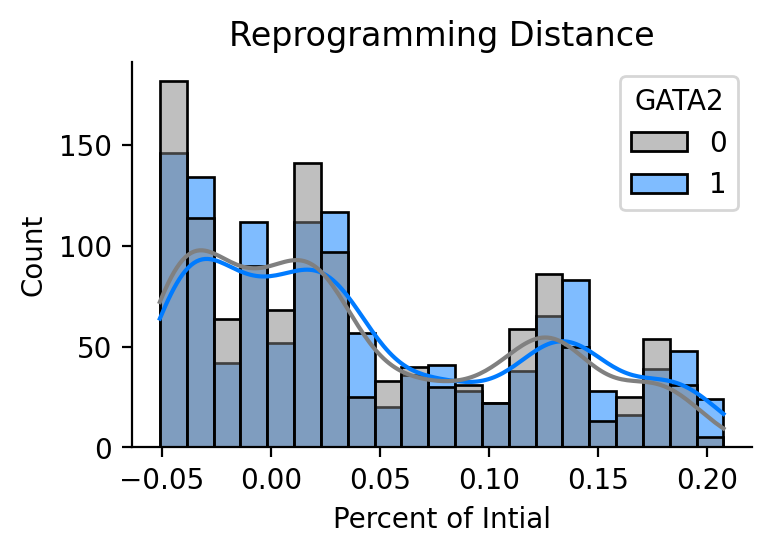

In [6]:
color_palette = [
    "#F08080",  # Light Coral (from the pink tulips)
    "#FFD700",  # Gold (from the yellow flowers)
    "#4169E1",  # Royal Blue (from the blue flowers)
    "#006400",  # Dark Green (from the foliage)
    "#FFA500",  # Orange (from the orange tulips)
    "#FFFFFF",  # White (from the white tulips)
    "#87CEEB",  # Sky Blue (from the water)
    "#6B8E23",  # Olive Drab (from the shadows in the foliage)
    "#D2B48C",  # Tan (from the tree trunks)
    "#90EE90",  # Light Green (from the lighter areas of the lawn)
]


sns.histplot(
    data=df, 
    x='recipe_diff',
    bins=21,
    hue='GATA2',
    kde=True,
    palette=['grey', '#007bff'],
)

sns.despine()
plt.title('Reprogramming Distance')
plt.xlabel('Percent of Intial')

Text(0.5, 0, 'Percent of Initial')

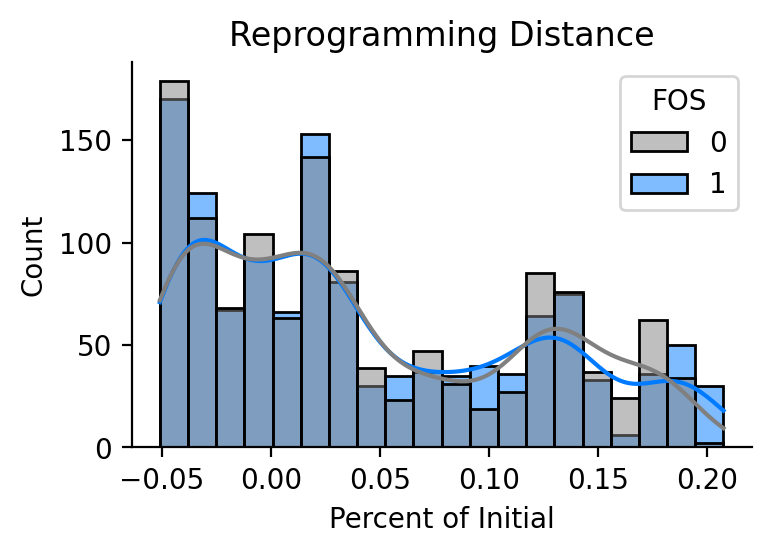

In [7]:
sns.histplot(
    data=df, 
    x='recipe_diff',
    bins=20,
    hue='FOS',
    kde=True,
    palette=['grey', '#007bff'],
)

sns.despine()
plt.title('Reprogramming Distance')
plt.xlabel('Percent of Initial')

In [8]:
# df['GATA2'] = df['GATA2'].astype(int)
unique_values = df['GATA2'].unique()
print(unique_values)


[1 0]


In [9]:
df.head()

,cluster_number,recipe_number,recipe,reprog_to_hsc_1,fib_1_to_reprog_10,recipe_diff,recipe_list,ETV6,FOS,FOSB,GATA2,GFI1B,IKZF1,MEF2C,REL,RUNX3,STAT5A
0,607,61,GATA2;FOS;STAT5A;REL;ETV6,0.678985,0.200316,0.207374,"[GATA2, FOS, STAT5A, REL, ETV6]",1,1,0,1,0,0,0,1,0,1
1,676,68,GATA2;FOS;STAT5A;IKZF1;ETV6,0.680233,0.186998,0.205917,"[GATA2, FOS, STAT5A, IKZF1, ETV6]",1,1,0,1,0,1,0,0,0,1
2,595,60,GATA2;FOS;STAT5A;REL;MEF2C,0.681894,0.200065,0.203978,"[GATA2, FOS, STAT5A, REL, MEF2C]",0,1,0,1,0,0,1,1,0,1
3,774,78,GATA2;FOS;REL;IKZF1;ETV6,0.682960,0.191363,0.202733,"[GATA2, FOS, REL, IKZF1, ETV6]",1,1,0,1,0,1,0,1,0,0
4,163,17,GATA2;GFI1B;FOS;IKZF1;MEF2C,0.683928,0.202149,0.201604,"[GATA2, GFI1B, FOS, IKZF1, MEF2C]",0,1,0,1,1,1,1,0,0,0


Text(0.5, 0, 'Distance to Target')

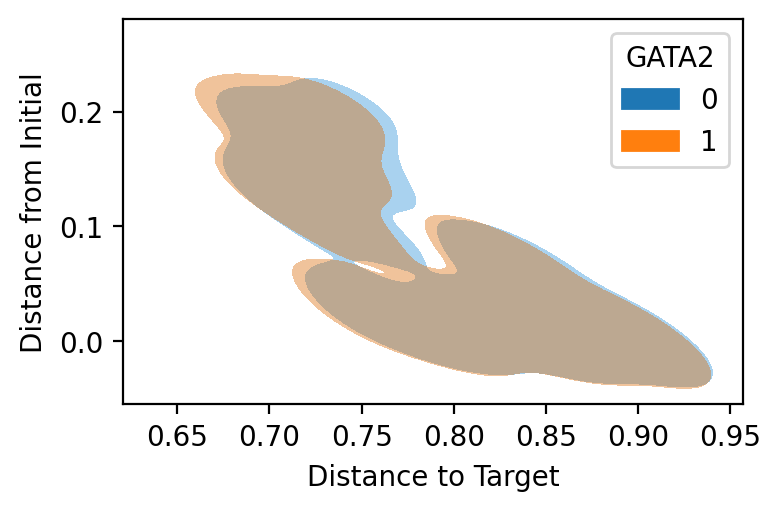

In [10]:
# 2d KDE
sns.kdeplot(
    data=df, 
    x='reprog_to_hsc_1',
    y='fib_1_to_reprog_10',
    hue='GATA2',
    fill=True,
    levels=2,
    alpha=0.4,
)

plt.ylabel('Distance from Initial')
plt.xlabel('Distance to Target')

,cluster_number,recipe_number,recipe,reprog_to_hsc_1,fib_1_to_reprog_10,recipe_diff,recipe_list,ETV6,FOS,FOSB,GATA2,GFI1B,IKZF1,MEF2C,REL,RUNX3,STAT5A,core_positive
0,607,61,GATA2;FOS;STAT5A;REL;ETV6,0.678985,0.200316,0.207374,"[GATA2, FOS, STAT5A, REL, ETV6]",1,1,0,1,0,0,0,1,0,1,False
1,676,68,GATA2;FOS;STAT5A;IKZF1;ETV6,0.680233,0.186998,0.205917,"[GATA2, FOS, STAT5A, IKZF1, ETV6]",1,1,0,1,0,1,0,0,0,1,False
2,595,60,GATA2;FOS;STAT5A;REL;MEF2C,0.681894,0.200065,0.203978,"[GATA2, FOS, STAT5A, REL, MEF2C]",0,1,0,1,0,0,1,1,0,1,False
3,774,78,GATA2;FOS;REL;IKZF1;ETV6,0.682960,0.191363,0.202733,"[GATA2, FOS, REL, IKZF1, ETV6]",1,1,0,1,0,1,0,1,0,0,False
4,163,17,GATA2;GFI1B;FOS;IKZF1;MEF2C,0.683928,0.202149,0.201604,"[GATA2, GFI1B, FOS, IKZF1, MEF2C]",0,1,0,1,1,1,1,0,0,0,True


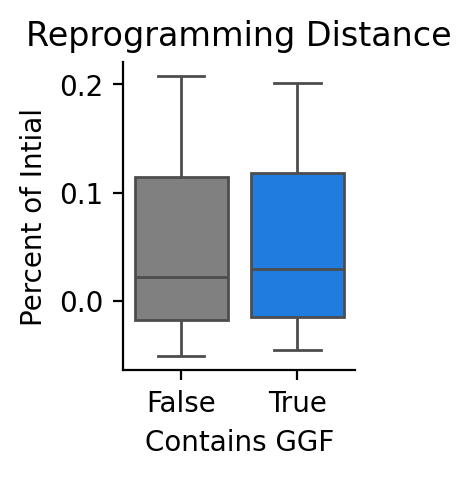

In [11]:
query = [
    'GATA2',
    'GFI1B',
    'FOS',
]

df['core_positive'] = df[query].sum(axis=1) == 3

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 1.5, 2

sns.boxplot(
    data=df, 
    x='core_positive',
    y='recipe_diff',
    hue='core_positive',
    palette=['grey', '#007bff'],
    legend=False,
)

sns.despine()
plt.title('Reprogramming Distance')
plt.ylabel('Percent of Intial')
plt.xlabel('Contains GGF')

df.head()

Text(0.5, 0, 'Percent of Intial')

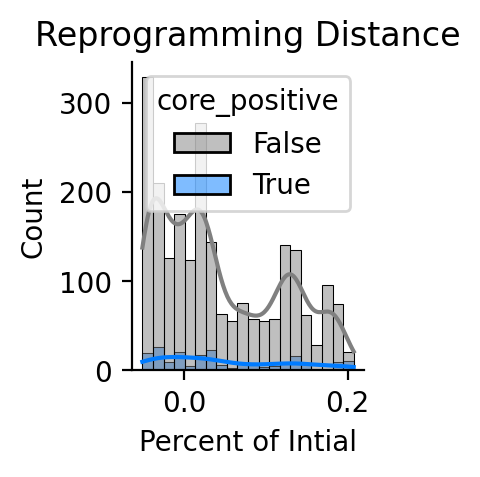

In [12]:
sns.histplot(
    data=df, 
    x='recipe_diff',
    bins=20,
    hue='core_positive',
    kde=True,
    palette=['grey', '#007bff'],
)

sns.despine()
plt.title('Reprogramming Distance')
plt.xlabel('Percent of Intial')

Text(0.5, 0, 'Contains GATA2')

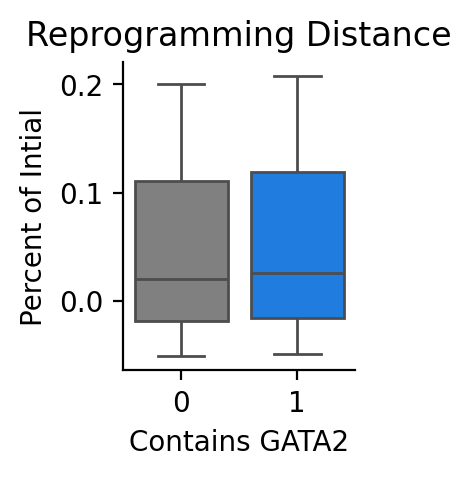

In [13]:
query = [
    'GATA2',
    'GFI1B',
    'FOS',
]

df['core_positive'] = df[query].sum(axis=1) == 3

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 1.5, 2

sns.boxplot(
    data=df, 
    x='GATA2',
    y='recipe_diff',
    hue='GATA2',
    palette=['grey', '#007bff'],
    legend=False,
)

sns.despine()
plt.title('Reprogramming Distance')
plt.ylabel('Percent of Intial')
plt.xlabel('Contains GATA2')

# plot best recipes

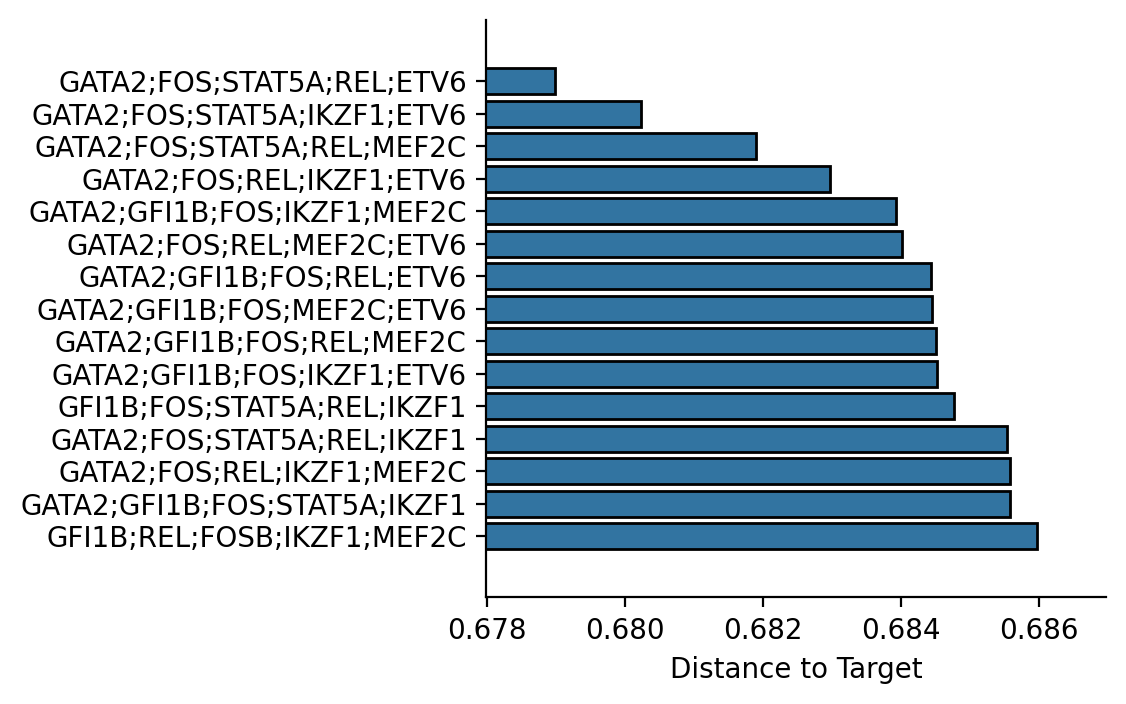

In [14]:
# plot recipes by closest to target
n_plot = 15

df = df.sort_values(by='reprog_to_hsc_1', 
                    ascending=True)


plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, (n_plot / 4)
sns.barplot(
    data=df.head(n_plot),
    y='recipe',
    x='reprog_to_hsc_1',
    ec='k',
)

plt.ylabel("")
plt.xlabel("Distance to Target")
sns.despine()

plt.xlim(
    df['reprog_to_hsc_1'].head(n_plot).min()-0.001, 
    df['reprog_to_hsc_1'].head(n_plot).max()+0.001,
)
plt.margins(y=0.1, x=0.05)


In [15]:
### Idea: get the KDE functions for all the recipes.  See which 

## N's histograms

In [16]:
# query_yellow = [
#     'GATA2',
#     'FOS',
#     'REL',
#     'IKZF1',
#     'MEF2C'
# ]
# query_gray = [
#     'GATA2',
#     'FOS',
#     'STAT5A',
#     'REL',
#     'ETV6'
# ]
# df['core_positive_yellow'] = df[query_yellow].sum(axis=1) == 5
# df['core_positive_gray'] = df[query_gray].sum(axis=1) == 5


# df['core_positive'] = df[query_yellow].sum(axis=1) == 5

# sns.histplot(
#     data=df[(df['core_positive_yellow'] == 1)| (df['core_positive_gray'] == 1)],
#     x='recipe_diff',
#     bins=20,
#     hue='core_positive_yellow',
#     kde=True,
#     palette=['yellow', 'gray'],
# )

# sns.despine()
# plt.title('Reprogramming Distance')
# plt.xlabel('Percent of Intial')

In [17]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Define the recipes with their corresponding one-hot encodings in the correct order
# recipes = {
#     'GATA2;FOS;REL;IKZF1;MEF2C': [0, 1, 0, 1, 0, 1, 1, 1, 0, 0],
#     'GATA2;FOS;STAT5A;IKZF1;ETV6': [1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#     'GATA2;FOS;STAT5A;REL;IKZF1': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
#     'GATA2;FOS;STAT5A;REL;MEF2C': [0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
#     'GATA2;GFI1B;FOS;MEF2C;ETV6': [1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
#     'GATA2;GFI1B;FOS;REL;ETV6': [1, 1, 0, 1, 1, 0, 0, 1, 0, 0],
#     'GATA2;GFI1B;FOS;REL;MEF2C': [0, 1, 0, 1, 1, 0, 1, 1, 0, 0],
#     'GATA2;GFI1B;FOS;STAT5A;IKZF1': [0, 1, 0, 1, 1, 1, 0, 0, 0, 1]
# }

# # Create a new column in the dataframe for the recipes
# df['recipe_group'] = 'Other'

# # Assign each recipe group based on the one-hot encoded columns
# for recipe, encoding in recipes.items():
#     mask = (df[['ETV6', 'FOS', 'FOSB', 'GATA2', 'GFI1B', 'IKZF1', 'MEF2C', 'REL', 'RUNX3', 'STAT5A']] == encoding).all(axis=1)
#     df.loc[mask, 'recipe_group'] = recipe

# # Define a color palette: grey for 'Other', and different colors for your specified recipes
# palette = sns.color_palette("husl", len(recipes))  # Generate a palette with unique colors
# palette = ['grey'] + list(palette)  # Adding grey for 'Other'

# # Create a categorical mapping from recipe_group to colors
# hue_order = ['Other'] + list(recipes.keys())  # Order of hues
# palette_dict = dict(zip(hue_order, palette))

# # Plotting the histogram with recipe_diff on the x-axis and hue as the recipe_group
# plt.figure(figsize=(10, 8))
# ax = sns.histplot(data=df, x='recipe_diff', bins=20, hue='recipe_group', palette=palette_dict, kde=True)
# sns.despine()

# # Log-scale the y-axis
# ax.set_yscale('log')

# plt.title('Reprogramming Distance')
# plt.xlabel('Percent of Initial')
# plt.tight_layout()
# plt.show()


In [18]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Define the recipes with their corresponding one-hot encodings
# mean_ranked_recipes = {
#     'GFI1B;FOSB;IKZF1;RUNX3;ETV6': [0, 1, 1, 1, 1, 1, 0, 0, 1, 1],
#     'REL;FOSB;IKZF1;RUNX3;MEF2C': [1, 1, 1, 1, 0, 1, 1, 0, 1, 0],
#     'STAT5A;FOSB;IKZF1;RUNX3;ETV6': [1, 1, 1, 1, 0, 1, 0, 0, 1, 1],
#     'REL;FOSB;IKZF1;RUNX3;ETV6': [1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
#     'GFI1B;FOS;STAT5A;FOSB;RUNX3': [1, 1, 1, 1, 1, 0, 0, 0, 1, 0],
#     'STAT5A;REL;FOSB;RUNX3;MEF2C': [1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
#     'GFI1B;FOS;FOSB;RUNX3;ETV6': [1, 1, 1, 1, 0, 0, 0, 0, 1, 1],
#     'FOS;FOSB;IKZF1;RUNX3;MEF2C': [1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
#     'GATA2;REL;FOSB;RUNX3;ETV6': [1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
#     'FOS;REL;FOSB;RUNX3;ETV6': [1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
#     'GATA2;STAT5A;FOSB;RUNX3;ETV6': [1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
#     'GFI1B;FOSB;IKZF1;MEF2C;ETV6': [1, 1, 1, 1, 0, 1, 1, 0, 0, 1],
#     'FOSB;IKZF1;RUNX3;MEF2C;ETV6': [1, 1, 1, 1, 0, 1, 1, 0, 0, 1],
#     'GFI1B;REL;FOSB;RUNX3;ETV6': [1, 1, 1, 1, 0, 0, 0, 1, 0, 1],
#     'FOS;FOSB;RUNX3;MEF2C;ETV6': [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
#     'FOS;STAT5A;FOSB;RUNX3;ETV6': [1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
#     'GFI1B;FOS;FOSB;RUNX3;MEF2C': [1, 1, 1, 1, 1, 0, 1, 0, 1, 0],
#     'FOS;REL;FOSB;RUNX3;MEF2C': [1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
#     'GFI1B;FOSB;RUNX3;MEF2C;ETV6': [1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
#     'GATA2;FOSB;RUNX3;MEF2C;ETV6': [1, 1, 0, 1, 0, 0, 1, 0, 1, 1]
# }

# min_ranked_recipes = {
#     'GATA2;FOS;STAT5A;REL;ETV6': [1, 1, 0, 1, 0, 0, 0, 0, 1, 1],
#     'GATA2;FOS;STAT5A;IKZF1;ETV6': [1, 1, 0, 1, 0, 0, 0, 0, 0, 1],
#     'GATA2;FOS;STAT5A;REL;MEF2C': [1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#     'GATA2;FOS;REL;IKZF1;ETV6': [1, 1, 0, 1, 0, 0, 0, 0, 0, 1],
#     'GATA2;GFI1B;FOS;IKZF1;MEF2C': [1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
#     'GATA2;FOS;REL;MEF2C;ETV6': [1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
#     'GATA2;GFI1B;FOS;REL;ETV6': [1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
#     'GATA2;GFI1B;FOS;MEF2C;ETV6': [1, 1, 0, 0, 1, 0, 1, 0, 0, 1],
#     'GATA2;GFI1B;FOS;REL;MEF2C': [1, 1, 0, 0, 1, 0, 1, 0, 0, 0],
#     'GATA2;GFI1B;FOS;IKZF1;ETV6': [1, 1, 0, 0, 0, 1, 0, 0, 0, 1],
#     'GFI1B;FOS;STAT5A;REL;IKZF1': [1, 1, 0, 0, 0, 1, 0, 0, 0, 1],
#     'GATA2;FOS;STAT5A;REL;IKZF1': [1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#     'GATA2;FOS;REL;IKZF1;MEF2C': [1, 1, 0, 1, 0, 1, 1, 0, 0, 0],
#     'GATA2;GFI1B;FOS;STAT5A;IKZF1': [1, 1, 0, 0, 0, 1, 0, 0, 0, 1],
#     'GFI1B;REL;FOSB;IKZF1;MEF2C': [1, 1, 1, 0, 0, 1, 1, 0, 0, 0],
#     'GATA2;FOS;REL;FOSB;ETV6': [1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
#     'GATA2;FOS;STAT5A;IKZF1;MEF2C': [1, 1, 0, 1, 1, 1, 0, 0, 0, 1],
# }

# # Create a new column in the dataframe for the recipes
# df['recipe_group'] = 'Other'

# # Assign each recipe group based on the one-hot encoding
# for recipe, encoding in mean_ranked_recipes.items():
#     df.loc[(df[query] == encoding).all(axis=1), 'recipe_group'] = 'Mean Ranked'

# for recipe, encoding in min_ranked_recipes.items():
#     df.loc[(df[query] == encoding).all(axis=1), 'recipe_group'] = 'Min Ranked'

# # Identify overlapping recipes
# mean_recipes = set(mean_ranked_recipes.keys())
# min_recipes = set(min_ranked_recipes.keys())
# overlap_recipes = mean_recipes & min_recipes

# # Update the 'recipe_group' column for overlapping recipes
# for recipe in overlap_recipes:
#     encoding = mean_ranked_recipes[recipe]
#     df.loc[(df[query] == encoding).all(axis=1), 'recipe_group'] = 'Overlap'

# # Define a color palette
# palette = {
#     'Mean Ranked': 'blue',
#     'Min Ranked': 'yellow',
#     'Overlap': 'pink',
#     'Other': 'grey'
# }

# # Plot the histogram
# sns.histplot(
#     data=df,
#     x='recipe_diff',
#     bins=20,
#     hue='recipe_group',
#     kde=True,
#     palette=palette
# )

# # Set log scale for y-axis
# plt.yscale('log')

# sns.despine()
# plt.title('Reprogramming Distance')
# plt.xlabel('Percent of Initial')
# plt.show()


In [19]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Define the one-hot encoding for each recipe
# def encode_recipe(recipe_str, columns):
#     recipe_list = recipe_str.split(';')
#     return [1 if col in recipe_list else 0 for col in columns]

# # Columns in the DataFrame
# columns = ['ETV6', 'FOS', 'FOSB', 'GATA2', 'GFI1B', 'IKZF1', 'MEF2C', 'REL', 'RUNX3', 'STAT5A']

# # Define the recipes with their corresponding one-hot encodings
# mean_ranked_recipes = {
#     'GFI1B;FOSB;IKZF1;RUNX3;ETV6': encode_recipe('GFI1B;FOSB;IKZF1;RUNX3;ETV6', columns),
#     'REL;FOSB;IKZF1;RUNX3;MEF2C': encode_recipe('REL;FOSB;IKZF1;RUNX3;MEF2C', columns),
#     'STAT5A;FOSB;IKZF1;RUNX3;ETV6': encode_recipe('STAT5A;FOSB;IKZF1;RUNX3;ETV6', columns),
#     'REL;FOSB;IKZF1;RUNX3;ETV6': encode_recipe('REL;FOSB;IKZF1;RUNX3;ETV6', columns),
#     'GFI1B;FOS;STAT5A;FOSB;RUNX3': encode_recipe('GFI1B;FOS;STAT5A;FOSB;RUNX3', columns),
#     'STAT5A;REL;FOSB;RUNX3;MEF2C': encode_recipe('STAT5A;REL;FOSB;RUNX3;MEF2C', columns),
#     'GFI1B;FOS;FOSB;RUNX3;ETV6': encode_recipe('GFI1B;FOS;FOSB;RUNX3;ETV6', columns),
#     'FOS;FOSB;IKZF1;RUNX3;MEF2C': encode_recipe('FOS;FOSB;IKZF1;RUNX3;MEF2C', columns),
#     'GATA2;REL;FOSB;RUNX3;ETV6': encode_recipe('GATA2;REL;FOSB;RUNX3;ETV6', columns),
#     'FOS;REL;FOSB;RUNX3;ETV6': encode_recipe('FOS;REL;FOSB;RUNX3;ETV6', columns),
#     'GATA2;STAT5A;FOSB;RUNX3;ETV6': encode_recipe('GATA2;STAT5A;FOSB;RUNX3;ETV6', columns),
#     'GFI1B;FOSB;IKZF1;MEF2C;ETV6': encode_recipe('GFI1B;FOSB;IKZF1;MEF2C;ETV6', columns),
#     'FOSB;IKZF1;RUNX3;MEF2C;ETV6': encode_recipe('FOSB;IKZF1;RUNX3;MEF2C;ETV6', columns),
#     'GFI1B;REL;FOSB;RUNX3;ETV6': encode_recipe('GFI1B;REL;FOSB;RUNX3;ETV6', columns),
#     'FOS;FOSB;RUNX3;MEF2C;ETV6': encode_recipe('FOS;FOSB;RUNX3;MEF2C;ETV6', columns),
#     'FOS;STAT5A;FOSB;RUNX3;ETV6': encode_recipe('FOS;STAT5A;FOSB;RUNX3;ETV6', columns),
#     'GFI1B;FOS;FOSB;RUNX3;MEF2C': encode_recipe('GFI1B;FOS;FOSB;RUNX3;MEF2C', columns),
#     'FOS;REL;FOSB;RUNX3;MEF2C': encode_recipe('FOS;REL;FOSB;RUNX3;MEF2C', columns),
#     'GFI1B;FOSB;RUNX3;MEF2C;ETV6': encode_recipe('GFI1B;FOSB;RUNX3;MEF2C;ETV6', columns),
#     'GATA2;FOSB;RUNX3;MEF2C;ETV6': encode_recipe('GATA2;FOSB;RUNX3;MEF2C;ETV6', columns)
# }

# min_ranked_recipes = {
#     'GATA2;FOS;STAT5A;REL;ETV6': encode_recipe('GATA2;FOS;STAT5A;REL;ETV6', columns),
#     'GATA2;FOS;STAT5A;IKZF1;ETV6': encode_recipe('GATA2;FOS;STAT5A;IKZF1;ETV6', columns),
#     'GATA2;FOS;STAT5A;REL;MEF2C': encode_recipe('GATA2;FOS;STAT5A;REL;MEF2C', columns),
#     'GATA2;FOS;REL;IKZF1;ETV6': encode_recipe('GATA2;FOS;REL;IKZF1;ETV6', columns),
#     'GATA2;GFI1B;FOS;IKZF1;MEF2C': encode_recipe('GATA2;GFI1B;FOS;IKZF1;MEF2C', columns),
#     'GATA2;FOS;REL;MEF2C;ETV6': encode_recipe('GATA2;FOS;REL;MEF2C;ETV6', columns),
#     'GATA2;GFI1B;FOS;REL;ETV6': encode_recipe('GATA2;GFI1B;FOS;REL;ETV6', columns),
#     'GATA2;GFI1B;FOS;MEF2C;ETV6': encode_recipe('GATA2;GFI1B;FOS;MEF2C;ETV6', columns),
#     'GATA2;GFI1B;FOS;REL;MEF2C': encode_recipe('GATA2;GFI1B;FOS;REL;MEF2C', columns),
#     'GATA2;GFI1B;FOS;IKZF1;ETV6': encode_recipe('GATA2;GFI1B;FOS;IKZF1;ETV6', columns),
#     'GFI1B;FOS;STAT5A;REL;IKZF1': encode_recipe('GFI1B;FOS;STAT5A;REL;IKZF1', columns),
#     'GATA2;FOS;STAT5A;REL;IKZF1': encode_recipe('GATA2;FOS;STAT5A;REL;IKZF1', columns),
#     'GATA2;FOS;REL;IKZF1;MEF2C': encode_recipe('GATA2;FOS;REL;IKZF1;MEF2C', columns),
#     'GATA2;GFI1B;FOS;STAT5A;IKZF1': encode_recipe('GATA2;GFI1B;FOS;STAT5A;IKZF1', columns),
#     'GFI1B;REL;FOSB;IKZF1;MEF2C': encode_recipe('GFI1B;REL;FOSB;IKZF1;MEF2C', columns),
#     'GATA2;FOS;REL;FOSB;ETV6': encode_recipe('GATA2;FOS;REL;FOSB;ETV6', columns),
#     'GATA2;FOS;STAT5A;IKZF1;MEF2C': encode_recipe('GATA2;FOS;STAT5A;IKZF1;MEF2C', columns),
# }

# # Create a new column in the dataframe for the recipes
# df['recipe_group'] = 'Other'

# # Assign each recipe group based on the one-hot encoding
# for recipe, encoding in mean_ranked_recipes.items():
#     match = (df[columns] == encoding).all(axis=1)
#     df.loc[match, 'recipe_group'] = 'Mean Ranked'

# for recipe, encoding in min_ranked_recipes.items():
#     match = (df[columns] == encoding).all(axis=1)
#     df.loc[match, 'recipe_group'] = 'Min Ranked'

# # Identify overlapping recipes
# mean_recipes = set(mean_ranked_recipes.keys())
# min_recipes = set(min_ranked_recipes.keys())
# overlap_recipes = mean_recipes & min_recipes

# # Update the 'recipe_group' column for overlapping recipes
# for recipe in overlap_recipes:
#     encoding = mean_ranked_recipes[recipe]
#     match = (df[columns] == encoding).all(axis=1)
#     df.loc[match, 'recipe_group'] = 'Overlap'

# # Define a color palette
# palette = {
#     'Mean Ranked': 'blue',
#     'Min Ranked': 'yellow',
#     'Overlap': 'pink',
#     'Other': 'grey'
# }

# # Plot the histogram
# sns.histplot(
#     data=df,
#     x='recipe_diff',
#     bins=20,
#     hue='recipe_group',
#     kde=True,
#     palette=palette
# )

# # Set log scale for y-axis
# plt.yscale('log')

# sns.despine()
# plt.title('Reprogramming Distance')
# plt.xlabel('Percent of Initial')
# plt.show()



In [20]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Define the one-hot encoding for each recipe
# def encode_recipe(recipe_str, columns):
#     recipe_list = recipe_str.split(';')
#     return [1 if col in recipe_list else 0 for col in columns]

# # Columns in the DataFrame
# columns = ['ETV6', 'FOS', 'FOSB', 'GATA2', 'GFI1B', 'IKZF1', 'MEF2C', 'REL', 'RUNX3', 'STAT5A']

# # Define the recipes with their corresponding one-hot encodings
# mean_ranked_recipes = {
#     'GFI1B;FOSB;IKZF1;RUNX3;ETV6': encode_recipe('GFI1B;FOSB;IKZF1;RUNX3;ETV6', columns),
#     'REL;FOSB;IKZF1;RUNX3;MEF2C': encode_recipe('REL;FOSB;IKZF1;RUNX3;MEF2C', columns),
#     'STAT5A;FOSB;IKZF1;RUNX3;ETV6': encode_recipe('STAT5A;FOSB;IKZF1;RUNX3;ETV6', columns),
#     'REL;FOSB;IKZF1;RUNX3;ETV6': encode_recipe('REL;FOSB;IKZF1;RUNX3;ETV6', columns),
#     'GFI1B;FOS;STAT5A;FOSB;RUNX3': encode_recipe('GFI1B;FOS;STAT5A;FOSB;RUNX3', columns),
#     'STAT5A;REL;FOSB;RUNX3;MEF2C': encode_recipe('STAT5A;REL;FOSB;RUNX3;MEF2C', columns),
#     'GFI1B;FOS;FOSB;RUNX3;ETV6': encode_recipe('GFI1B;FOS;FOSB;RUNX3;ETV6', columns),
#     'FOS;FOSB;IKZF1;RUNX3;MEF2C': encode_recipe('FOS;FOSB;IKZF1;RUNX3;MEF2C', columns),
#     'GATA2;REL;FOSB;RUNX3;ETV6': encode_recipe('GATA2;REL;FOSB;RUNX3;ETV6', columns),
#     'FOS;REL;FOSB;RUNX3;ETV6': encode_recipe('FOS;REL;FOSB;RUNX3;ETV6', columns),
#     'GATA2;STAT5A;FOSB;RUNX3;ETV6': encode_recipe('GATA2;STAT5A;FOSB;RUNX3;ETV6', columns),
#     'GFI1B;FOSB;IKZF1;MEF2C;ETV6': encode_recipe('GFI1B;FOSB;IKZF1;MEF2C;ETV6', columns),
#     'FOSB;IKZF1;RUNX3;MEF2C;ETV6': encode_recipe('FOSB;IKZF1;RUNX3;MEF2C;ETV6', columns),
#     'GFI1B;REL;FOSB;RUNX3;ETV6': encode_recipe('GFI1B;REL;FOSB;RUNX3;ETV6', columns),
#     'FOS;FOSB;RUNX3;MEF2C;ETV6': encode_recipe('FOS;FOSB;RUNX3;MEF2C;ETV6', columns),
#     'FOS;STAT5A;FOSB;RUNX3;ETV6': encode_recipe('FOS;STAT5A;FOSB;RUNX3;ETV6', columns),
#     'GFI1B;FOS;FOSB;RUNX3;MEF2C': encode_recipe('GFI1B;FOS;FOSB;RUNX3;MEF2C', columns),
#     'FOS;REL;FOSB;RUNX3;MEF2C': encode_recipe('FOS;REL;FOSB;RUNX3;MEF2C', columns),
#     'GFI1B;FOSB;RUNX3;MEF2C;ETV6': encode_recipe('GFI1B;FOSB;RUNX3;MEF2C;ETV6', columns),
#     'GATA2;FOSB;RUNX3;MEF2C;ETV6': encode_recipe('GATA2;FOSB;RUNX3;MEF2C;ETV6', columns)
# }

# min_ranked_recipes = {
#     'GATA2;FOS;STAT5A;REL;ETV6': encode_recipe('GATA2;FOS;STAT5A;REL;ETV6', columns),
#     'GATA2;FOS;STAT5A;IKZF1;ETV6': encode_recipe('GATA2;FOS;STAT5A;IKZF1;ETV6', columns),
#     'GATA2;FOS;STAT5A;REL;MEF2C': encode_recipe('GATA2;FOS;STAT5A;REL;MEF2C', columns),
#     'GATA2;FOS;REL;IKZF1;ETV6': encode_recipe('GATA2;FOS;REL;IKZF1;ETV6', columns),
#     'GATA2;GFI1B;FOS;IKZF1;MEF2C': encode_recipe('GATA2;GFI1B;FOS;IKZF1;MEF2C', columns),
#     'GATA2;FOS;REL;MEF2C;ETV6': encode_recipe('GATA2;FOS;REL;MEF2C;ETV6', columns),
#     'GATA2;GFI1B;FOS;REL;ETV6': encode_recipe('GATA2;GFI1B;FOS;REL;ETV6', columns),
#     'GATA2;GFI1B;FOS;MEF2C;ETV6': encode_recipe('GATA2;GFI1B;FOS;MEF2C;ETV6', columns),
#     'GATA2;GFI1B;FOS;REL;MEF2C': encode_recipe('GATA2;GFI1B;FOS;REL;MEF2C', columns),
#     'GATA2;GFI1B;FOS;IKZF1;ETV6': encode_recipe('GATA2;GFI1B;FOS;IKZF1;ETV6', columns),
#     'GFI1B;FOS;STAT5A;REL;IKZF1': encode_recipe('GFI1B;FOS;STAT5A;REL;IKZF1', columns),
#     'GATA2;FOS;STAT5A;REL;IKZF1': encode_recipe('GATA2;FOS;STAT5A;REL;IKZF1', columns),
#     'GATA2;FOS;REL;IKZF1;MEF2C': encode_recipe('GATA2;FOS;REL;IKZF1;MEF2C', columns),
#     'GATA2;GFI1B;FOS;STAT5A;IKZF1': encode_recipe('GATA2;GFI1B;FOS;STAT5A;IKZF1', columns),
#     'GFI1B;REL;FOSB;IKZF1;MEF2C': encode_recipe('GFI1B;REL;FOSB;IKZF1;MEF2C', columns),
#     'GATA2;FOS;REL;FOSB;ETV6': encode_recipe('GATA2;FOS;REL;FOSB;ETV6', columns),
#     'GATA2;FOS;STAT5A;IKZF1;MEF2C': encode_recipe('GATA2;FOS;STAT5A;IKZF1;MEF2C', columns),
# }

# # Create a new column in the dataframe for the recipes
# df['recipe_group'] = 'Other'

# # Assign each recipe group based on the one-hot encoding
# for recipe, encoding in mean_ranked_recipes.items():
#     match = (df[columns] == encoding).all(axis=1)
#     df.loc[match, 'recipe_group'] = 'Mean Ranked'

# for recipe, encoding in min_ranked_recipes.items():
#     match = (df[columns] == encoding).all(axis=1)
#     # If already 'Mean Ranked', it will be overwritten by 'Overlap'
#     if df.loc[match, 'recipe_group'].eq('Mean Ranked').all():
#         df.loc[match, 'recipe_group'] = 'Overlap'
#     else:
#         df.loc[match, 'recipe_group'] = 'Min Ranked'

# # Define a color palette
# palette = {
#     'Mean Ranked': 'blue',
#     'Min Ranked': 'yellow',
#     'Overlap': 'pink',
#     'Other': 'grey'
# }

# # Plot the histogram
# sns.histplot(
#     data=df,
#     x='recipe_diff',
#     bins=20,
#     hue='recipe_group',
#     kde=True,
#     palette=palette
# )

# # Set log scale for y-axis
# plt.yscale('log')

# sns.despine()
# plt.title('Reprogramming Distance')
# plt.xlabel('Percent of Initial')
# plt.show()


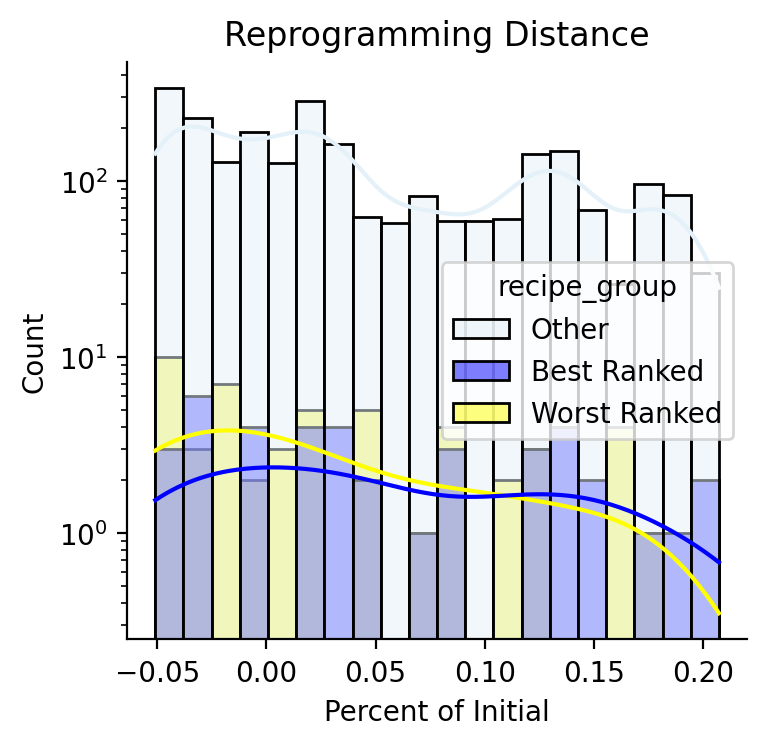

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the one-hot encoding for each recipe
def encode_recipe(recipe_str, columns):
    recipe_list = recipe_str.split(';')
    return [1 if col in recipe_list else 0 for col in columns]

# Columns in the DataFrame
columns = ['ETV6', 'FOS', 'FOSB', 'GATA2', 'GFI1B', 'IKZF1', 'MEF2C', 'REL', 'RUNX3', 'STAT5A']

# Define the recipes with their corresponding one-hot encodings
mean_high_recipes = {
    'GATA2;FOS;REL;IKZF1;MEF2C': encode_recipe('GATA2;FOS;REL;IKZF1;MEF2C', columns),
    'GATA2;GFI1B;FOS;STAT5A;ETV6': encode_recipe('GATA2;GFI1B;FOS;STAT5A;ETV6', columns),
    'GATA2;GFI1B;FOS;STAT5A;ETV6': encode_recipe('GATA2;GFI1B;FOS;STAT5A;ETV6', columns),
    'GATA2;GFI1B;FOS;STAT5A;IKZF1': encode_recipe('GATA2;GFI1B;FOS;STAT5A;IKZF1', columns),
    'GATA2;STAT5A;REL;IKZF1;MEF2C': encode_recipe('GATA2;STAT5A;REL;IKZF1;MEF2C', columns)
}

mean_low_recipes = {
    'GFI1B;FOSB;IKZF1;RUNX3;ETV6': encode_recipe('GFI1B;FOSB;IKZF1;RUNX3;ETV6', columns),
    'REL;FOSB;IKZF1;RUNX3;MEF2C': encode_recipe('REL;FOSB;IKZF1;RUNX3;MEF2C', columns),
    'STAT5A;FOSB;IKZF1;RUNX3;ETV6': encode_recipe('STAT5A;FOSB;IKZF1;RUNX3;ETV6', columns),
    'REL;FOSB;IKZF1;RUNX3;ETV6': encode_recipe('REL;FOSB;IKZF1;RUNX3;ETV6', columns),
    'GFI1B;FOS;STAT5A;FOSB;RUNX3': encode_recipe('GFI1B;FOS;STAT5A;FOSB;RUNX3', columns)

}

# Create a new column in the dataframe for the recipes
df['recipe_group'] = 'Other'

# Assign each recipe group based on the one-hot encoding
for recipe, encoding in mean_high_recipes.items():
    match = (df[columns] == encoding).all(axis=1)
    df.loc[match, 'recipe_group'] = 'Best Ranked'

for recipe, encoding in mean_low_recipes.items():
    match = (df[columns] == encoding).all(axis=1)
    # If already 'Max Ranked', it will be overwritten by 'Overlap'
    if df.loc[match, 'recipe_group'].eq('Best Ranked').all():
        df.loc[match, 'recipe_group'] = 'Overlap'
    else:
        df.loc[match, 'recipe_group'] = 'Worst Ranked'

# Define a color palette
palette = {
    'Best Ranked': 'blue',
    'Worst Ranked': 'yellow',
    'Overlap': 'pink',
    'Other': '#E4F1F9'
}

# Plot the histogram
sns.histplot(
    data=df,
    x='recipe_diff',
    bins=20,
    hue='recipe_group',
    kde=True,
    palette=palette
)

# Set log scale for y-axis
plt.yscale('log')

sns.despine()
plt.title('Reprogramming Distance')
plt.xlabel('Percent of Initial')
plt.show()


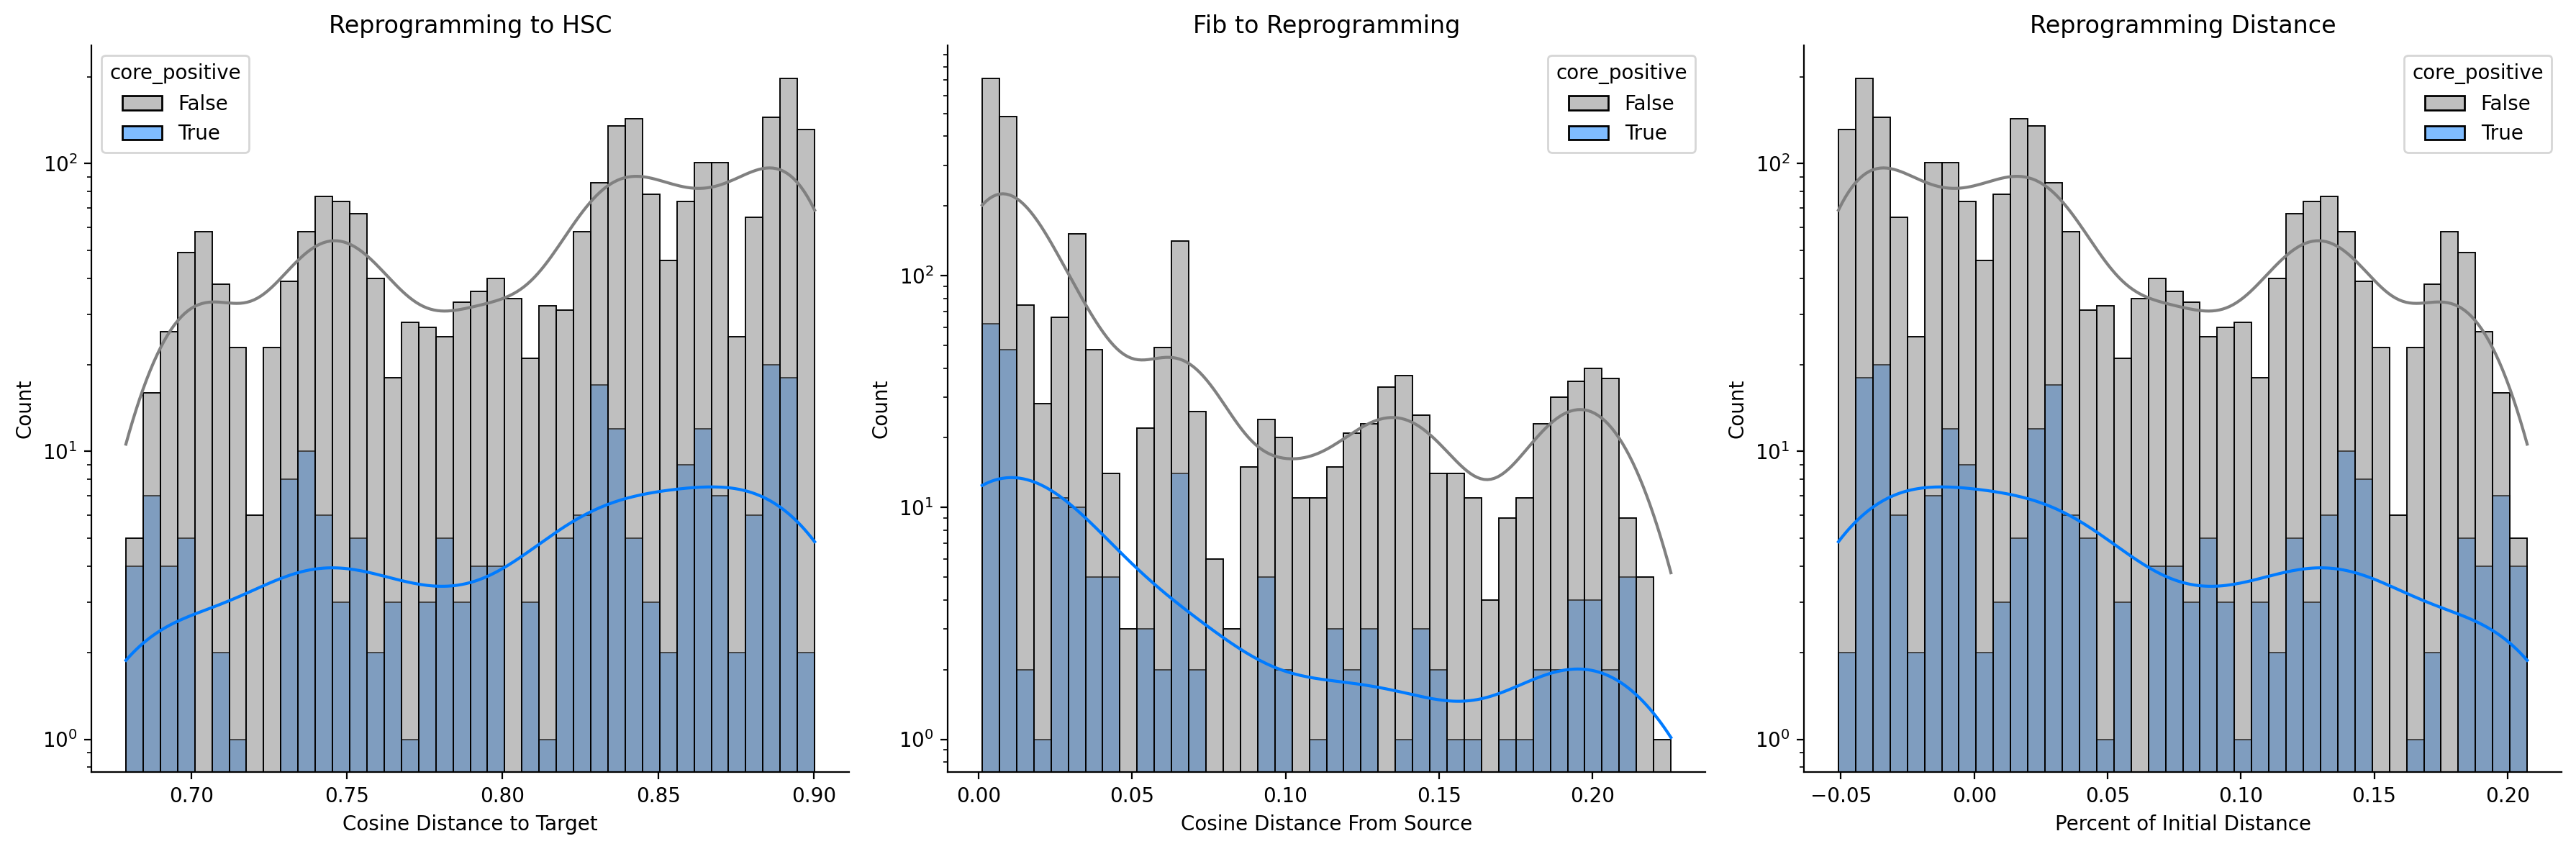

In [22]:
query = [
    'GATA2',
    'GFI1B',
    'FOS',
]

df['core_positive'] = df[query].sum(axis=1) == 3

import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of x variables and corresponding labels
x_vars = ['reprog_to_hsc_1', 'fib_1_to_reprog_10', 'recipe_diff']
x_labels = ['Cosine Distance to Target', 'Cosine Distance From Source', 'Percent of Initial Distance']
titles = ['Reprogramming to HSC', 'Fib to Reprogramming', 'Reprogramming Distance']

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop over the x variables and create each subplot
for i, (x_var, x_label, title) in enumerate(zip(x_vars, x_labels, titles)):
    sns.histplot(
        data=df,
        x=x_var,
        bins=40,
        hue='core_positive',
        kde=True,
        palette=['grey', '#007bff'],
        ax=axes[i]
    )
    axes[i].set_yscale('log') 
    sns.despine(ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel(x_label)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [28]:
df.rename(columns={'core_positive': 'Core Positive'}, inplace=True)
df.head(10)

,cluster_number,recipe_number,recipe,reprog_to_hsc_1,fib_1_to_reprog_10,recipe_diff,recipe_list,ETV6,FOS,FOSB,GATA2,GFI1B,IKZF1,MEF2C,REL,RUNX3,STAT5A,Core Positive,recipe_group
0,607,61,GATA2;FOS;STAT5A;REL;ETV6,0.678985,0.200316,0.207374,"[GATA2, FOS, STAT5A, REL, ETV6]",1,1,0,1,0,0,0,1,0,1,False,Other
1,676,68,GATA2;FOS;STAT5A;IKZF1;ETV6,0.680233,0.186998,0.205917,"[GATA2, FOS, STAT5A, IKZF1, ETV6]",1,1,0,1,0,1,0,0,0,1,False,Other
2,595,60,GATA2;FOS;STAT5A;REL;MEF2C,0.681894,0.200065,0.203978,"[GATA2, FOS, STAT5A, REL, MEF2C]",0,1,0,1,0,0,1,1,0,1,False,Other
3,774,78,GATA2;FOS;REL;IKZF1;ETV6,0.682960,0.191363,0.202733,"[GATA2, FOS, REL, IKZF1, ETV6]",1,1,0,1,0,1,0,1,0,0,False,Other
4,163,17,GATA2;GFI1B;FOS;IKZF1;MEF2C,0.683928,0.202149,0.201604,"[GATA2, GFI1B, FOS, IKZF1, MEF2C]",0,1,0,1,1,1,1,0,0,0,True,Other
5,810,81,GATA2;FOS;REL;MEF2C;ETV6,0.684013,0.197463,0.201505,"[GATA2, FOS, REL, MEF2C, ETV6]",1,1,0,1,0,0,1,1,0,0,False,Other
6,109,11,GATA2;GFI1B;FOS;REL;ETV6,0.684428,0.199118,0.201020,"[GATA2, GFI1B, FOS, REL, ETV6]",1,1,0,1,1,0,0,1,0,0,True,Other
7,206,21,GATA2;GFI1B;FOS;MEF2C;ETV6,0.684440,0.192777,0.201006,"[GATA2, GFI1B, FOS, MEF2C, ETV6]",1,1,0,1,1,0,1,0,0,0,True,Other
8,96,10,GATA2;GFI1B;FOS;REL;MEF2C,0.684497,0.194818,0.200939,"[GATA2, GFI1B, FOS, REL, MEF2C]",0,1,0,1,1,0,1,1,0,0,True,Other
9,180,18,GATA2;GFI1B;FOS;IKZF1;ETV6,0.684521,0.200663,0.200911,"[GATA2, GFI1B, FOS, IKZF1, ETV6]",1,1,0,1,1,1,0,0,0,0,True,Other


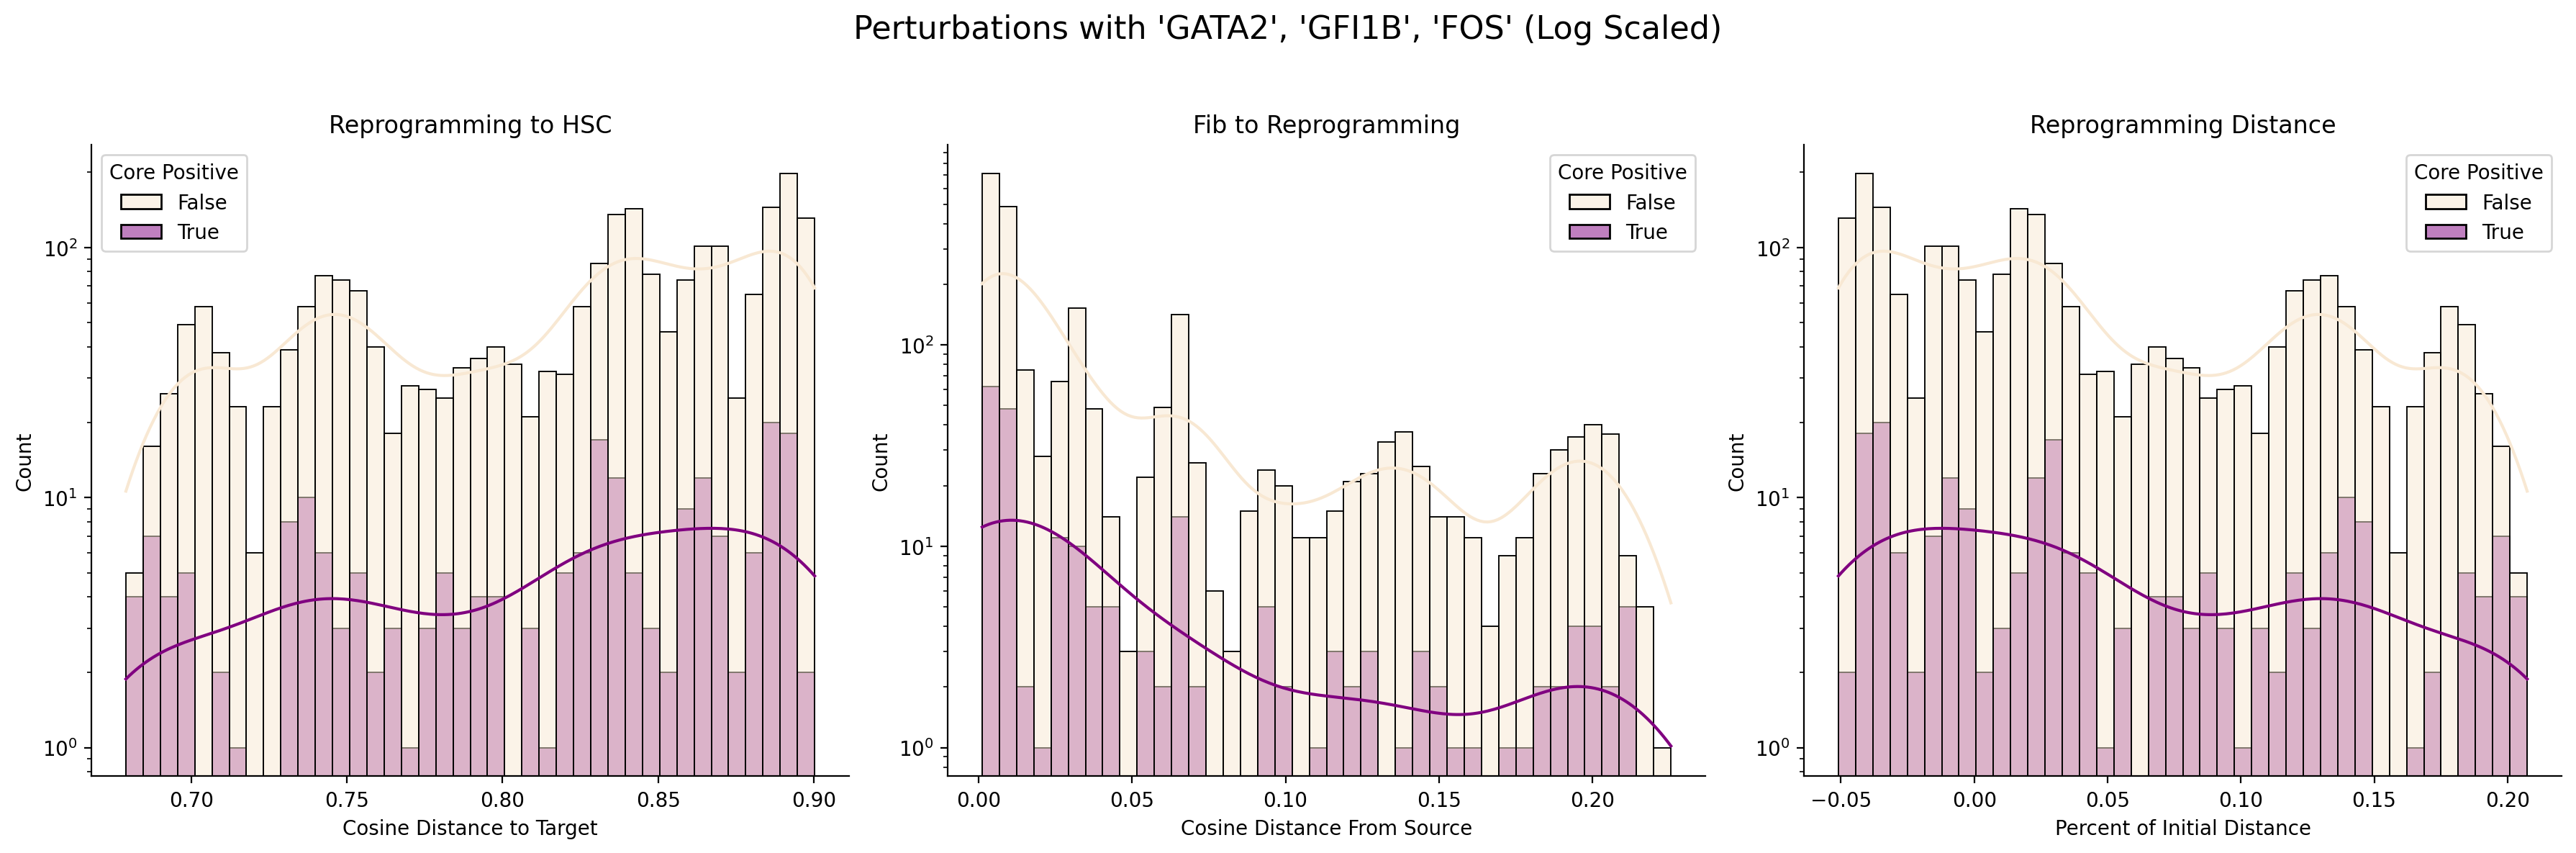

In [30]:

import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of x variables and corresponding labels
x_vars = ['reprog_to_hsc_1', 'fib_1_to_reprog_10', 'recipe_diff']
x_labels = ['Cosine Distance to Target', 'Cosine Distance From Source', 'Percent of Initial Distance']
titles = ['Reprogramming to HSC', 'Fib to Reprogramming', 'Reprogramming Distance']

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop over the x variables and create each subplot
for i, (x_var, x_label, title) in enumerate(zip(x_vars, x_labels, titles)):
    sns.histplot(
        data=df,
        x=x_var,
        bins=40,
        hue='Core Positive',
        kde=True,  # Disable KDE if needed
        palette=['#f8e8d3ff', 'purple'],
        ax=axes[i]
    )
    axes[i].set_yscale('log')  # Apply log scale to the y-axis
    sns.despine(ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel(x_label)

# Add the overall title
plt.suptitle("Perturbations with 'GATA2', 'GFI1B', 'FOS' (Log Scaled)", fontsize=16)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle

# Show the plot
plt.show()


# Drafts

In [24]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming your dataframe is already loaded as 'df'

# # Define the recipes with their corresponding one-hot encodings in the correct order
# recipes = {
#     'GATA2;FOS;REL;IKZF1;MEF2C': [0, 1, 0, 1, 0, 1, 1, 1, 0, 0],
#     'GATA2;FOS;STAT5A;IKZF1;ETV6': [1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#     'GATA2;FOS;STAT5A;REL;IKZF1': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
#     'GATA2;FOS;STAT5A;REL;MEF2C': [0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
#     'GATA2;GFI1B;FOS;MEF2C;ETV6': [1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
#     'GATA2;GFI1B;FOS;REL;ETV6': [1, 1, 0, 1, 1, 0, 0, 1, 0, 0],
#     'GATA2;GFI1B;FOS;REL;MEF2C': [0, 1, 0, 1, 1, 0, 1, 1, 0, 0],
#     'GATA2;GFI1B;FOS;STAT5A;IKZF1': [0, 1, 0, 1, 1, 1, 0, 0, 0, 1]
# }

# # Create a new column in the dataframe for the recipes
# df['recipe_group'] = None

# # Assign each recipe group based on the one-hot encoded columns
# for recipe, encoding in recipes.items():
#     mask = (df[['ETV6', 'FOS', 'FOSB', 'GATA2', 'GFI1B', 'IKZF1', 'MEF2C', 'REL', 'RUNX3', 'STAT5A']] == encoding).all(axis=1)
#     df.loc[mask, 'recipe_group'] = recipe

# # Plotting the histogram with recipe_diff on the y-axis and hue as the recipe_group
# plt.figure(figsize=(10, 8))
# sns.histplot(data=df, y='recipe_diff', hue='recipe_group', multiple='stack')
# plt.title('Histogram of Recipe Differences with Different Recipes as Hue')
# plt.xlabel('Count')
# plt.ylabel('Recipe Difference')
# plt.legend(title='Recipes', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


In [25]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Define the recipes with their corresponding one-hot encodings in the correct order
# recipes = {
#     'GATA2;FOS;REL;IKZF1;MEF2C': [0, 1, 0, 1, 0, 1, 1, 1, 0, 0],
#     'GATA2;FOS;STAT5A;IKZF1;ETV6': [1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
#     'GATA2;FOS;STAT5A;REL;IKZF1': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
#     'GATA2;FOS;STAT5A;REL;MEF2C': [0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
#     'GATA2;GFI1B;FOS;MEF2C;ETV6': [1, 1, 0, 1, 1, 0, 1, 0, 0, 0],
#     'GATA2;GFI1B;FOS;REL;ETV6': [1, 1, 0, 1, 1, 0, 0, 1, 0, 0],
#     'GATA2;GFI1B;FOS;REL;MEF2C': [0, 1, 0, 1, 1, 0, 1, 1, 0, 0],
#     'GATA2;GFI1B;FOS;STAT5A;IKZF1': [0, 1, 0, 1, 1, 1, 0, 0, 0, 1]
# }

# # Create a new column in the dataframe for the recipes
# df['recipe_group'] = 'Other'

# # Assign each recipe group based on the one-hot encoded columns
# for recipe, encoding in recipes.items():
#     mask = (df[['ETV6', 'FOS', 'FOSB', 'GATA2', 'GFI1B', 'IKZF1', 'MEF2C', 'REL', 'RUNX3', 'STAT5A']] == encoding).all(axis=1)
#     df.loc[mask, 'recipe_group'] = recipe

# # Define a color palette: grey for 'Other', and different colors for your specified recipes
# palette = sns.color_palette("husl", len(recipes))  # Generate a palette with unique colors
# palette = ['grey'] + list(palette)  # Adding grey for 'Other'

# # Create a categorical mapping from recipe_group to colors
# hue_order = ['Other'] + list(recipes.keys())  # Order of hues
# palette_dict = dict(zip(hue_order, palette))

# # Plotting the histogram with recipe_diff on the x-axis and hue as the recipe_group
# plt.figure(figsize=(10, 8))
# sns.histplot(data=df, x='recipe_diff', bins=20, hue='recipe_group', palette=palette_dict, kde=True)
# sns.despine()
# plt.title('Reprogramming Distance')
# plt.xlabel('Percent of Initial')
# plt.tight_layout()
# plt.show()
